In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')
holidays = pd.read_csv('holidays_events.csv')

Our data contains various columns that help us understand store sales, customer behavior, and external factors that may affect them. Below is a breakdown of each column and its meaning in a simple way.

In [3]:
train['date']

0          2013-01-01
1          2013-01-01
2          2013-01-01
3          2013-01-01
4          2013-01-01
              ...    
3000883    2017-08-15
3000884    2017-08-15
3000885    2017-08-15
3000886    2017-08-15
3000887    2017-08-15
Name: date, Length: 3000888, dtype: object

The date column represents the specific day when a transaction or sale occurred. It is important for identifying trends, patterns, and seasonal effects.

In [4]:
train['family']

0                          AUTOMOTIVE
1                           BABY CARE
2                              BEAUTY
3                           BEVERAGES
4                               BOOKS
                      ...            
3000883                       POULTRY
3000884                PREPARED FOODS
3000885                       PRODUCE
3000886    SCHOOL AND OFFICE SUPPLIES
3000887                       SEAFOOD
Name: family, Length: 3000888, dtype: object

The family column represents the category of the product sold, such as dairy, beverages, or electronics. This helps us analyze which product categories are more popular over time.

In [5]:
train['onpromotion']

0            0
1            0
2            0
3            0
4            0
          ... 
3000883      0
3000884      1
3000885    148
3000886      8
3000887      0
Name: onpromotion, Length: 3000888, dtype: int64

The onpromotion column tells us how many items from a particular product category were sold at a discount on that day. Promotions can significantly impact sales, so this is an important factor.

In [6]:
stores['city']

0             Quito
1             Quito
2             Quito
3             Quito
4     Santo Domingo
5             Quito
6             Quito
7             Quito
8             Quito
9             Quito
10          Cayambe
11        Latacunga
12        Latacunga
13         Riobamba
14           Ibarra
15    Santo Domingo
16            Quito
17            Quito
18         Guaranda
19            Quito
20    Santo Domingo
21             Puyo
22           Ambato
23        Guayaquil
24          Salinas
25        Guayaquil
26            Daule
27        Guayaquil
28        Guayaquil
29        Guayaquil
30         Babahoyo
31        Guayaquil
32          Quevedo
33        Guayaquil
34           Playas
35         Libertad
36           Cuenca
37             Loja
38           Cuenca
39          Machala
40          Machala
41           Cuenca
42       Esmeraldas
43            Quito
44            Quito
45            Quito
46            Quito
47            Quito
48            Quito
49           Ambato


The city column indicates the city where the store is located. Since different cities may have different customer behaviors and economic conditions, this helps in understanding regional differences in sales.

In [7]:
stores['state']

0                          Pichincha
1                          Pichincha
2                          Pichincha
3                          Pichincha
4     Santo Domingo de los Tsachilas
5                          Pichincha
6                          Pichincha
7                          Pichincha
8                          Pichincha
9                          Pichincha
10                         Pichincha
11                          Cotopaxi
12                          Cotopaxi
13                        Chimborazo
14                          Imbabura
15    Santo Domingo de los Tsachilas
16                         Pichincha
17                         Pichincha
18                           Bolivar
19                         Pichincha
20    Santo Domingo de los Tsachilas
21                           Pastaza
22                        Tungurahua
23                            Guayas
24                       Santa Elena
25                            Guayas
26                            Guayas
2

The state column represents the region of Ecuador where the store operates. This can be useful when analyzing economic factors, government regulations, or regional trends that may influence sales.

In [8]:
stores['type']

0     D
1     D
2     D
3     D
4     D
5     D
6     D
7     D
8     B
9     C
10    B
11    C
12    C
13    C
14    C
15    C
16    C
17    B
18    C
19    B
20    B
21    C
22    D
23    D
24    D
25    D
26    D
27    E
28    E
29    C
30    B
31    C
32    C
33    B
34    C
35    E
36    D
37    D
38    B
39    C
40    D
41    D
42    E
43    A
44    A
45    A
46    A
47    A
48    A
49    A
50    A
51    A
52    D
53    C
Name: type, dtype: object

The type column describes the type of store, such as a large supermarket or a small convenience store. Store types affect the variety of products available and customer preferences.



In [9]:
stores['cluster']

0     13
1     13
2      8
3      9
4      4
5     13
6      8
7      8
8      6
9     15
10     6
11    15
12    15
13     7
14    15
15     3
16    12
17    16
18    15
19     6
20     6
21     7
22     9
23     1
24     1
25    10
26     1
27    10
28    10
29     3
30    10
31     3
32     3
33     6
34     3
35    10
36     2
37     4
38     6
39     3
40     4
41     2
42    10
43     5
44    11
45    14
46    14
47    14
48    11
49    14
50    17
51    11
52    13
53     3
Name: cluster, dtype: int64

The cluster column groups stores with similar characteristics together. This is useful for comparing sales performance among similar types of stores.

In [10]:
transactions['transactions']

0         770
1        2111
2        2358
3        3487
4        1922
         ... 
83483    2804
83484    1573
83485    2255
83486     932
83487     802
Name: transactions, Length: 83488, dtype: int64

The transactions column represents the total number of purchases made in a store on a particular day. It helps us understand customer traffic and how busy a store was. More transactions generally indicate higher customer visits, but the total sales amount can still vary based on the number of items bought per transaction.

In [13]:
holidays['type']

0         Holiday
1         Holiday
2         Holiday
3         Holiday
4         Holiday
          ...    
345    Additional
346    Additional
347    Additional
348       Holiday
349    Additional
Name: type, Length: 350, dtype: object

The type column in the holiday dataset describes the type of special event or holiday, such as a national holiday, a regional event, or an additional day off. Different holidays may affect sales differently, depending on whether they encourage shopping or lead to store closures.

In [14]:
holidays['locale']

0         Local
1      Regional
2         Local
3         Local
4         Local
         ...   
345    National
346    National
347    National
348    National
349    National
Name: locale, Length: 350, dtype: object

The locale column tells us whether a holiday applies to the entire country, a specific region, or just one city. This helps us understand which stores may be affected by a holiday.

In [15]:
holidays['transferred']

0      False
1      False
2      False
3      False
4      False
       ...  
345    False
346    False
347    False
348    False
349    False
Name: transferred, Length: 350, dtype: bool

The transferred column indicates whether a holiday was moved to another date. If a holiday was transferred, it means the impact on sales might shift to a different day.



In [16]:
oil['dcoilwtico']

0         NaN
1       93.14
2       92.97
3       93.12
4       93.20
        ...  
1213    47.65
1214    46.40
1215    46.46
1216    45.96
1217    47.26
Name: dcoilwtico, Length: 1218, dtype: float64

The dcoilwtico column represents the daily price of crude oil (WTI). Oil prices can affect transportation costs, inflation, and overall economic conditions, which in turn influence consumer spending and store sales.

/home/alex/Desktop/jupyter_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


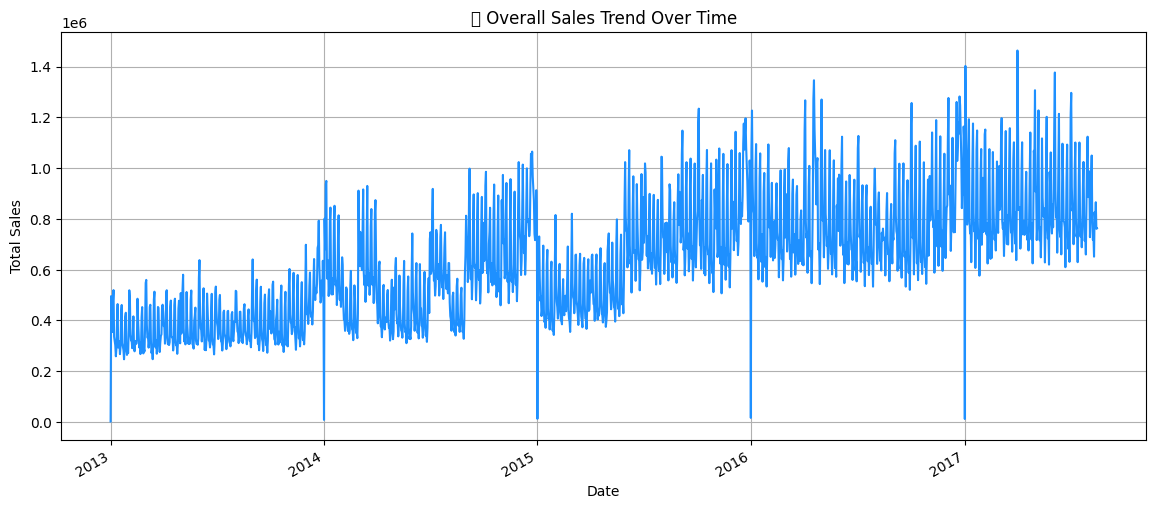

In [17]:
#  Convert date to datetime format
train['date'] = pd.to_datetime(train['date'])

#  Plot: Overall Sales Trend Over Time
plt.figure(figsize=(14, 6))
train.groupby('date').sum()['sales'].plot(title='📈 Overall Sales Trend Over Time', color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## 📊 Sales Trend Analysis

Sales show a **clear upward trend** over time, indicating **growth in store performance**. This suggests that the store has experienced consistent improvement in sales. 

- **Notable peaks** in the sales curve might correlate with **holidays** or **promotions**, reflecting spikes in customer activity during these periods.

The continuous rise in sales is a positive signal for the store, highlighting successful strategies or increasing demand over time.


/tmp/ipykernel_4230/3820686843.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_sales_by_type, x='type', y='sales', palette='viridis')


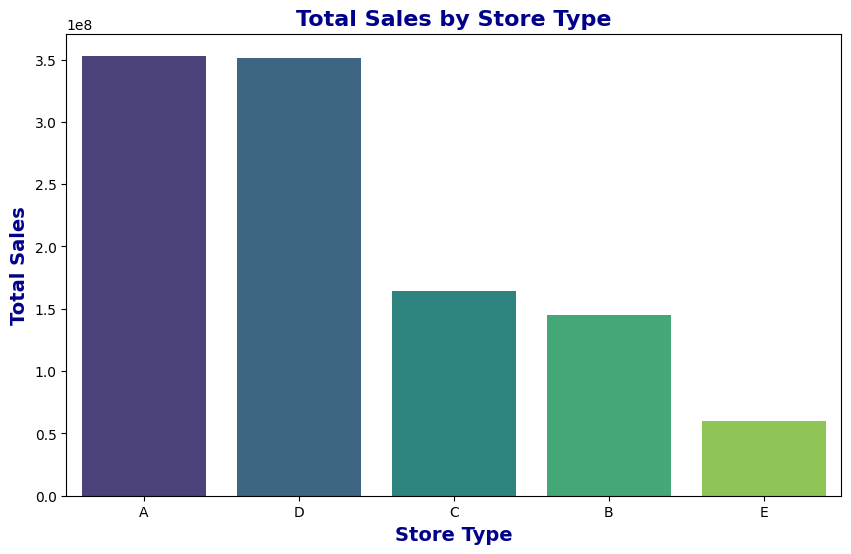

In [18]:
stores = pd.read_csv('stores.csv')
train_store = pd.merge(train, stores, on='store_nbr', how='left')
train_store = train_store.sort_values(by='type')  # Sort alphabetically

# Group by store type and sum the sales
total_sales_by_type = train_store.groupby('type')['sales'].sum().reset_index()

# Sort the values in descending order to highlight the highest sales
total_sales_by_type = total_sales_by_type.sort_values(by='sales', ascending=False)

# Plot the total sales by store type
plt.figure(figsize=(10, 6))
sns.barplot(data=total_sales_by_type, x='type', y='sales', palette='viridis')

# Add title and labels
plt.title('Total Sales by Store Type', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Store Type', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Total Sales', fontsize=14, fontweight='bold', color='darkblue')

# Show the plot
plt.show()


## 📊 Total Sales by Store Type

The following plot displays the **total sales** for each store type. By grouping the data based on store type and summing the sales for each category, we can compare the overall performance across different store types.

### Key Insights:
- **Store Type A** has the **highest total sales**, significantly outperforming other store types. This suggests that Type A stores are generating the most revenue across the board.
- **Store Type B** follows closely in terms of total sales, indicating that while it may not have the highest total sales, it is still performing strongly overall.
- **Store Type B and E** show lower total sales compared to A and D, which may indicate lower overall demand or a different sales strategy at these store types.

This comparison helps identify which store types are leading in terms of revenue generation and highlights the potential for growth or optimization in lower-performing store types.


/home/alex/Desktop/jupyter_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


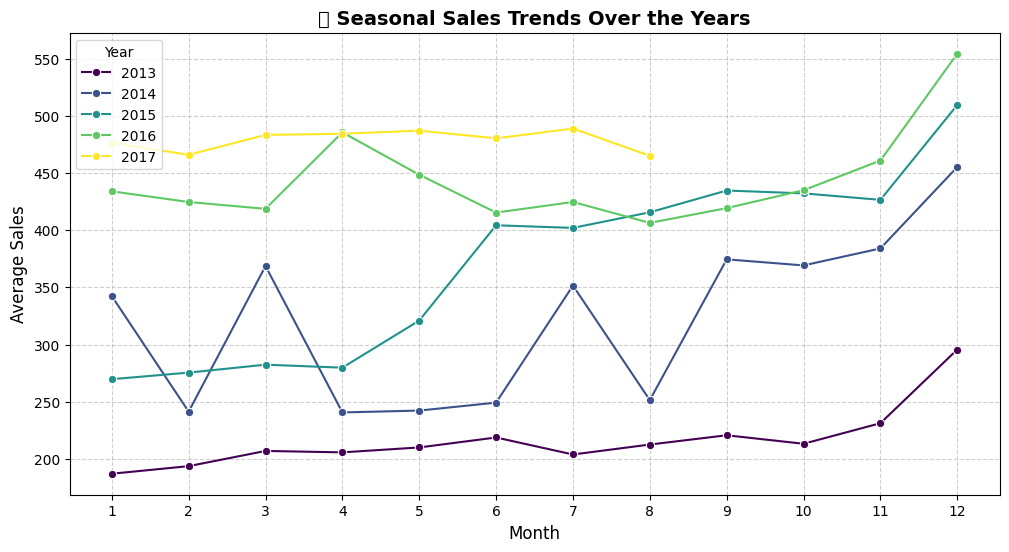

In [20]:
train['sales'] = pd.to_numeric(train['sales'], errors='coerce')

# Extract Month and Year for Seasonal Analysis
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

# Aggregate sales by month and year
monthly_sales = train.groupby(['year', 'month'])['sales'].mean().reset_index()

# Plot: Monthly Sales Trends Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', palette='viridis', marker="o")
plt.title('📅 Seasonal Sales Trends Over the Years', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title='Year', loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 📊 Seasonal Trend in Sales: Insights

The analysis reveals a **clear seasonal trend** in sales, with a noticeable **peak towards the end of the year**, particularly in **November and December**. 

### Key Insights:
- **Sales in Q4 (October to December)** experience a significant **uptick**, suggesting that **holiday shopping** and **seasonal promotions** are key drivers of increased sales during this period.
- The **sales surge** in Q4 indicates that customers tend to make more purchases towards the end of the year, likely due to **holiday shopping**, special promotions, and festive spending.


   id       date  store_nbr      family  sales  onpromotion  month  year  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0      1  2013   
1   1 2013-01-01          1   BABY CARE    0.0            0      1  2013   
2   2 2013-01-01          1      BEAUTY    0.0            0      1  2013   
3   3 2013-01-01          1   BEVERAGES    0.0            0      1  2013   
4   4 2013-01-01          1       BOOKS    0.0            0      1  2013   

   day_of_week  
0            1  
1            1  
2            1  
3            1  
4            1  


/tmp/ipykernel_4230/1190417501.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="viridis")


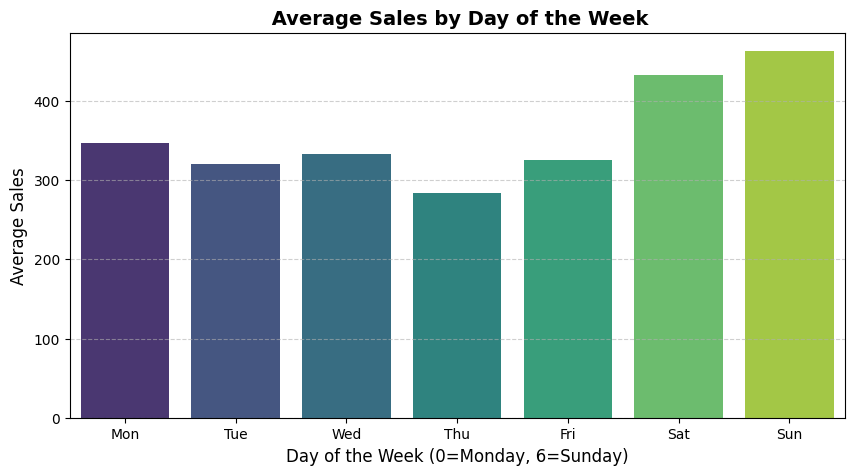

In [21]:
# Ensure Date Column is Datetime
train['date'] = pd.to_datetime(train['date'])

#  Create 'day_of_week' Feature
train['day_of_week'] = train['date'].dt.dayofweek

#  Check Data
print(train.head())  # Confirm that 'day_of_week' exists


#  Aggregate Sales by Day of the Week
sales_by_day = train.groupby("day_of_week")["sales"].mean()

#  Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="viridis")

#  Labels & Titles
plt.title(" Average Sales by Day of the Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## 📊 Sales Cyclicity by Weekday: Insights

The analysis of sales by weekday helps identify patterns and fluctuations in sales throughout the week. By visualizing how sales vary across different days, we can uncover useful trends.

### Key Insights:
- **Higher Sales on Weekends**: Sales tend to be **higher on Saturdays and Sundays**, indicating that consumers are more likely to shop during the weekend. This is a common pattern, especially in retail businesses.
- **Lower Sales on Weekdays**: **Monday and Tuesday** often show **lower sales**, suggesting that these days may experience slower foot traffic or fewer online purchases compared to the latter half of the week.

### Recommendations for Retailers:
- **Staffing**: Retailers should consider increasing staffing levels during the weekends when sales are higher to ensure excellent customer service and meet demand.
- **Promotions**: Offering **mid-week promotions** could help boost sales on slower days (like Monday and Tuesday) by incentivizing customers to shop early in the week.
- **Inventory Management**: Stocking up on high-demand items prior to weekends can help ensure product availability and prevent stockouts, especially on busy days like Saturdays.

Understanding sales cycles by weekday allows businesses to strategically plan **staffing, promotions, and inventory** to maximize sales and optimize operations.


In [22]:
oil = pd.read_csv('oil.csv')
print("Missing values in oil price column before merge:", oil['dcoilwtico'].isnull().sum())

# Fill missing values in oil prices with forward-fill method
oil['dcoilwtico'].fillna(method='ffill', inplace=True)  # Forward fill missing prices

# Confirm changes
print("Missing values in oil price column after fill:", oil['dcoilwtico'].isnull().sum())

Missing values in oil price column before merge: 43
Missing values in oil price column after fill: 1


/tmp/ipykernel_4230/1243461984.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oil['dcoilwtico'].fillna(method='ffill', inplace=True)  # Forward fill missing prices
/tmp/ipykernel_4230/1243461984.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil['dcoilwtico'].fillna(method='ffill', inplace=True)  # Forward fill missing prices


In [23]:
train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])

# Merge oil prices into the dataset
train = pd.merge(train, oil[['date', 'dcoilwtico']], on='date', how='left')

# Fill any remaining missing values
train['dcoilwtico'].fillna(method='ffill', inplace=True)  # Forward fill again after merging

# Confirm 'dcoilwtico' exists and has valid values
print(train[['date', 'sales', 'dcoilwtico']].dropna().head())

           date   sales  dcoilwtico
1782 2013-01-02     2.0       93.14
1783 2013-01-02     0.0       93.14
1784 2013-01-02     2.0       93.14
1785 2013-01-02  1091.0       93.14
1786 2013-01-02     0.0       93.14


/tmp/ipykernel_4230/3674682083.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['dcoilwtico'].fillna(method='ffill', inplace=True)  # Forward fill again after merging
/tmp/ipykernel_4230/3674682083.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['dcoilwtico'].fillna(method='ffill', inplace=True)  # Forward fill again after merging


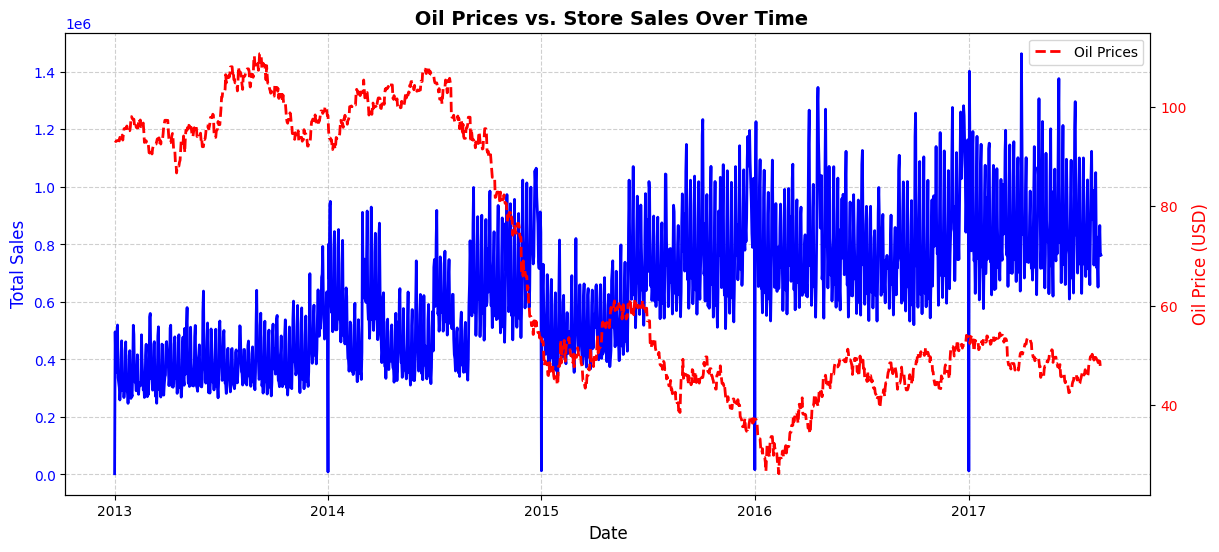

In [24]:
fig, ax1 = plt.subplots(figsize=(14, 6))

#  Sales Trend
ax1.plot(train.groupby('date')['sales'].sum(), color='blue', linewidth=2, label='Total Sales')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Sales', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.6)

#  Oil Prices (Secondary Axis)
ax2 = ax1.twinx()
ax2.plot(train.groupby('date')['dcoilwtico'].mean(), color='red', linestyle='dashed', linewidth=2, label='Oil Prices')
ax2.set_ylabel('Oil Price (USD)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(' Oil Prices vs. Store Sales Over Time', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

## 📊 Sales vs. Oil Prices: Insights

This analysis visualizes the relationship between **oil price fluctuations** and **sales trends**. By plotting these two variables, we can assess whether changes in oil prices influence sales performance.

### Key Insights:
- **No Clear Trend**: From the plot, we observe that there **is no consistent or clear trend** between oil prices and sales. Sales do not appear to rise or fall predictably as oil prices fluctuate.
- **Limited Correlation**: The lack of a clear correlation suggests that **oil prices may not be a strong predictor of sales trends** in this context. Other factors, such as promotions, holidays, or economic conditions, may have a greater impact on sales.
  
### Implications:
- **Oil Prices as a Predictor**: Since there is no evident relationship, **oil prices may not need to be considered** as a significant predictor in forecasting sales, at least for this dataset.
- **Further Analysis Needed**: Other external factors or internal business strategies should be investigated to better understand the drivers of sales, rather than focusing on oil prices alone.

By examining the sales and oil price data together, businesses can determine whether energy costs should influence their strategies or if they should focus on other variables for a more accurate forecast.


In [25]:
holidays_events = pd.read_csv('holidays_events.csv')

holidays_events.date = pd.to_datetime(holidays_events.date)

# Merge the two datasets on the 'date' column (or adjust to your actual column names)
train_with_holidays = pd.merge(train, holidays_events, on='date', how='left')

# # View the merged DataFrame
# train_with_holidays['type'][train_with_holidays['type'].isnull()] = 'no event'
# train_with_holidays['locale'][train_with_holidays['locale'].isnull()] = 'no event'

# train_with_holidays.isnull().sum()
train_with_holidays['description'].notnull().sum()

np.int64(502524)

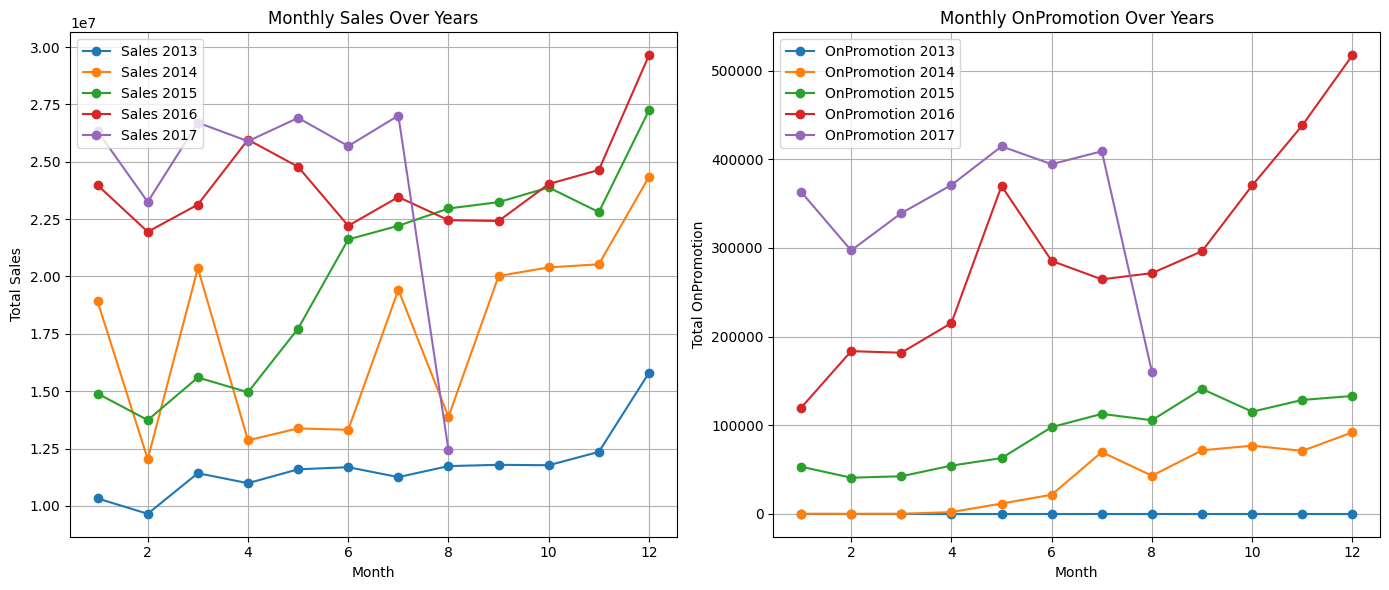

In [26]:

train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month

# Aggregate sales and onpromotion by year and month
agg_sales = train.groupby(['year', 'month'])['sales'].sum().reset_index()
agg_promotion = train.groupby(['year', 'month'])['onpromotion'].sum().reset_index()

# Get unique years
years = agg_sales['year'].unique()

# Create two separate plots
plt.figure(figsize=(14, 6))

# Plot 1: Sales over months for each year
plt.subplot(1, 2, 1)
for year in years:
    sales_data = agg_sales[agg_sales['year'] == year]
    plt.plot(sales_data['month'], sales_data['sales'], marker='o', label=f'Sales {year}')
plt.title('Monthly Sales Over Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)

# Plot 2: OnPromotion over months for each year
plt.subplot(1, 2, 2)
for year in years:
    promotion_data = agg_promotion[agg_promotion['year'] == year]
    plt.plot(promotion_data['month'], promotion_data['onpromotion'], marker='o', label=f'OnPromotion {year}')
plt.title('Monthly OnPromotion Over Years')
plt.xlabel('Month')
plt.ylabel('Total OnPromotion')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### **Sales and Promotions Relationship: Key Insights**  

- 📈 **Strong Positive Correlation** – Higher promotions lead to increased sales, reinforcing their effectiveness.  
- 🎯 **Seasonal Trends** – Sales and promotions peak during specific months, especially around holidays.  
- 🚀 **Impactful Strategy** – Promotions consistently drive sales growth across all observed years.  
- 🌍 **Yearly Variations** – External factors influence the scale of promotions and sales each year.  

💡 **Takeaway:** A well-planned promotion strategy aligned with seasonal trends can maximize sales impact.


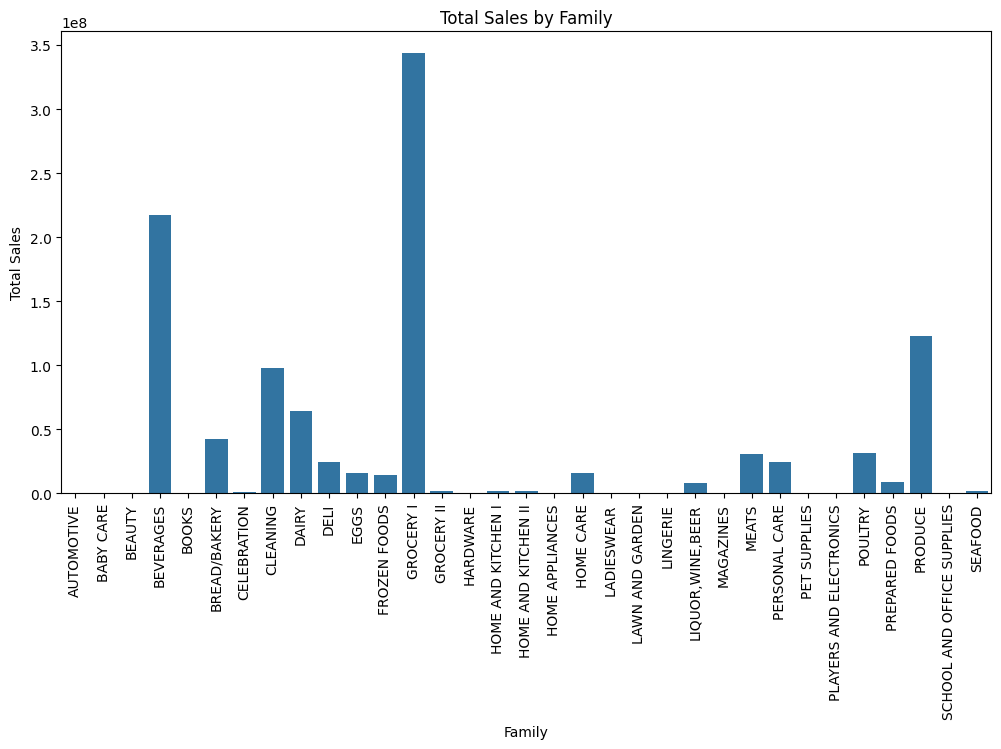

In [27]:
family_sales = train.groupby('family')['sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='family', y='sales', data=family_sales)
plt.xticks(rotation=90)
plt.title('Total Sales by Family')
plt.xlabel('Family')
plt.ylabel('Total Sales')
plt.show()

**Analysis of Total Sales by Family**  

This bar chart illustrates total sales across different product families. Key observations include:  

- **Grocery products dominate** 🛒 – The "Grocery I" and "Beverages" categories lead in sales, indicating essential, frequently purchased items.  
- **High demand for fresh products** 🥦 – "Produce" and "Dairy" have strong sales, showing consumer preference for perishable food items.  
- **Lower sales in non-essential categories** 📚 – Items like "Books," "Magazines," and "Lingerie" have minimal sales, suggesting they are less frequently purchased.  
- **Prepared foods perform well** 🍽️ – Indicating a trend towards convenience and ready-to-eat options.  

**Conclusion**  
Essential and frequently consumed products drive the highest sales, emphasizing the importance of groceries, fresh produce, and beverages in retail strategy. Non-essential categories see lower sales, likely due to consumer priorities and shopping habits.


In [28]:
correlation = train['sales'].corr(train['onpromotion'])
print(correlation)


0.4279232048121313


/tmp/ipykernel_4230/599238097.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_sales, x='day', y='sales', palette='viridis')


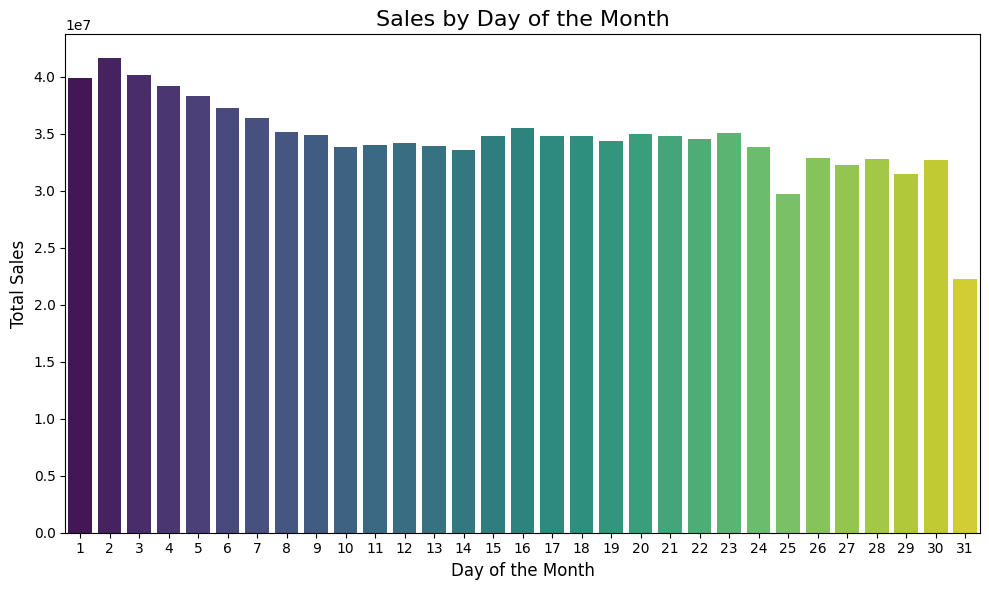

In [41]:
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day


day_sales = train.groupby('day')['sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=day_sales, x='day', y='sales', palette='viridis')

# Adding titles and labels
plt.title('Sales by Day of the Month', fontsize=16)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('sales_by_day.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

Sales are highest at the beginning of the month, particularly during the first five days, indicating that people tend to spend more right after receiving their salaries. Around the 15th, there is another noticeable increase in sales, aligning with mid-month salary payments. As the month progresses, sales gradually decline, suggesting that spending power diminishes over time. Towards the end of the month, sales remain relatively lower, with a sharp drop on the 31st, likely because not all months have 31 days. This pattern highlights the strong influence of salary payments on consumer spending behavior. Businesses can take advantage of these trends by launching promotions and marketing campaigns around the 1st and 15th while offering discounts towards the end of the month to sustain sales. Effective inventory management is also crucial, ensuring that stock levels align with peak demand periods.

In [42]:
print(train)
print(stores)
print(holidays)



              id       date  store_nbr                      family     sales  \
0              0 2013-01-01          1                  AUTOMOTIVE     0.000   
1              1 2013-01-01          1                   BABY CARE     0.000   
2              2 2013-01-01          1                      BEAUTY     0.000   
3              3 2013-01-01          1                   BEVERAGES     0.000   
4              4 2013-01-01          1                       BOOKS     0.000   
...          ...        ...        ...                         ...       ...   
3000883  3000883 2017-08-15          9                     POULTRY   438.133   
3000884  3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  year  month  day 

In [43]:



# Convert date columns to datetime
train['date'] = pd.to_datetime(train['date'])
holidays['date'] = pd.to_datetime(holidays['date'])

# Merge datasets
merged_data = pd.merge(train, holidays, on='date', how='left')

# Create a new column to identify holidays
merged_data['is_holiday'] = merged_data['type'].notna()

/tmp/ipykernel_4230/218007886.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_type_sales, x='type', y='sales', palette='viridis')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Additional'),
  Text(1, 0, 'Bridge'),
  Text(2, 0, 'Event'),
  Text(3, 0, 'Holiday'),
  Text(4, 0, 'Transfer'),
  Text(5, 0, 'Work Day')])

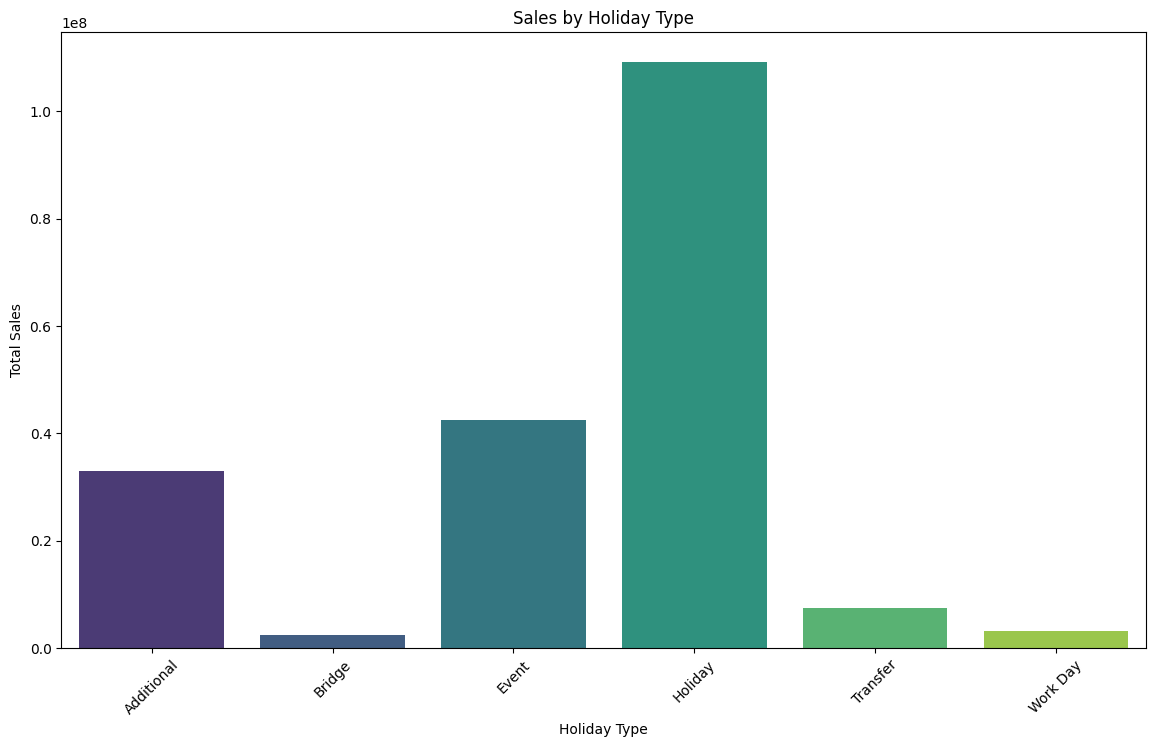

In [44]:
# Group by holiday type and sum sales
holiday_type_sales = merged_data.groupby('type')['sales'].sum().reset_index()

# Plot sales by holiday type
plt.figure(figsize=(14, 8))
sns.barplot(data=holiday_type_sales, x='type', y='sales', palette='viridis')
plt.title('Sales by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)



---

# 🌟 Holiday Sales Analysis 🌟

## 📊 Sales by Holiday Type

The bar chart titled **"Sales by Holiday Type"** illustrates the total sales for different types of holidays. The x-axis represents various holiday types, including **Additional**, **Bridge**, **Event**, **Holiday**, **Transfer**, and **Work Day**. The y-axis shows the total sales in units of 1e8.

### Key Insights:
- **Holiday**: The **Holiday** type has the highest total sales, significantly surpassing all other categories.
- **Event & Additional**: The **Event** and **Additional** types show notable sales figures, though much lower than **Holiday**.
- **Bridge, Transfer, & Work Day**: The **Bridge**, **Transfer**, and **Work Day** types have the lowest sales, with **Bridge** being the least among them.

## 🏆 Conclusion

This chart highlights the impact of different holiday types on sales, indicating that holidays have a substantial influence on consumer spending. Businesses should focus their marketing and promotion strategies around major holidays to maximize sales.

---



The image compares monthly sales during holiday and non-holiday periods, using normalized sales data (ranging from 0.0 to 1.0) across different months.

Key Insights
1. **Sales Trends**:
   - Sales during holiday periods are consistently higher than non-holiday periods, reflecting increased consumer activity.
   - Non-holiday sales show more stable but lower performance.

2. **Monthly Performance**:
   - Specific months with holidays likely show noticeable sales spikes.
   - Non-holiday months maintain a steady baseline, with minor fluctuations.

3. **Strategic Implications**:
   - Holidays are critical for driving revenue, requiring targeted marketing and inventory planning.
   - Non-holiday periods may benefit from promotions to boost sales.

 
 Conclusion
- **Holiday Impact**: Holidays significantly boost sales, making them key focus periods.
- **Actionable Insights**: Businesses should capitalize on holiday peaks and implement strategies to stabilize sales during non-holiday months.
```

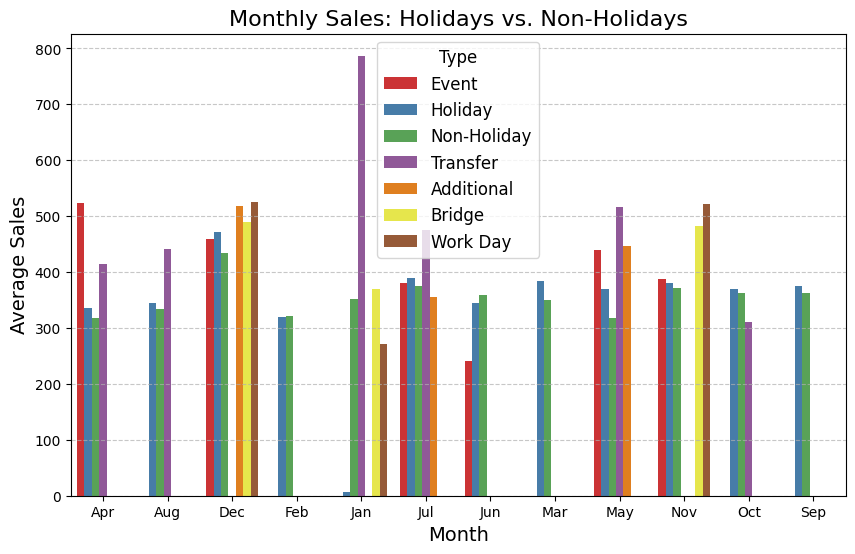

In [49]:
merged_df = pd.merge(train, holidays, on='date', how='left')

# Fill NaN in 'type' column with 'Non-Holiday'
merged_df['type'] = merged_df['type'].fillna('Non-Holiday')

# Extract 'month' from the 'date' column for monthly analysis
merged_df['month'] = merged_df['date'].dt.strftime('%b')  # %b gives abbreviated month names (e.g., Jan, Feb)

# Group by 'month' and 'type' to calculate average sales
monthly_sales = merged_df.groupby(['month', 'type'])['sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='month', y='sales', hue='type', palette='Set1')
plt.title('Monthly Sales: Holidays vs. Non-Holidays', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.legend(title='Type', title_fontsize=12, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



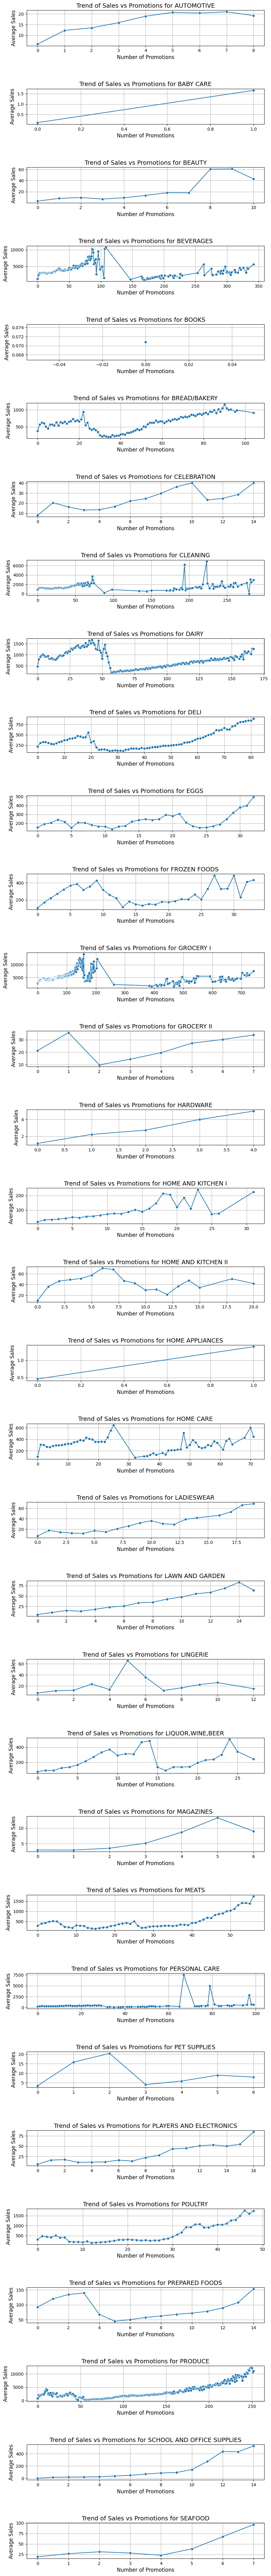

In [29]:
# Assuming train['family'] is a categorical column representing product families
families = train['family'].unique()

# Set up the figure size for the plots (increased size)
plt.figure(figsize=(10, 85))

for family in families:
    family_data = train[train['family'] == family]
    trend_data = family_data.groupby('onpromotion')['sales'].mean().reset_index()

    # Create a subplot for each family
    plt.subplot(len(families), 1, list(families).index(family) + 1)
    sns.lineplot(x=trend_data['onpromotion'], y=trend_data['sales'], marker="o")

    plt.xlabel("Number of Promotions", fontsize=12)
    plt.ylabel("Average Sales", fontsize=12)
    plt.title(f"Trend of Sales vs Promotions for {family}", fontsize=14)
    plt.grid(True)

# Adjust the layout to prevent overlapping
plt.tight_layout(pad=5.0)
plt.show()
